In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import wrangle_zillow as w
import warnings
warnings.filterwarnings("ignore")

# Our Zillow scenario continues:

# As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. 
# You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features;
# who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In [10]:
# Lets get the data

train, validate, test = w.split_data(w.prepare(w.aquire_zillow_data()))

In [11]:
# Lets sample this data 
train = train.sample(3000)

In [5]:
round(train.describe(),2)

,bedrooms,bathrooms,calculated_finished_squarefeet,tax_valuedollar_cnt,year_built,tax_amount,fips
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,3.31,2.26,1878.89,452641.19,1960.83,5511.36,6048.62
std,0.93,0.99,952.89,534712.37,22.30,6076.74,20.89
min,0.00,0.00,171.00,6363.00,1890.00,257.27,6037.00
25%,3.00,2.00,1264.00,191282.25,1949.00,2578.15,6037.00
50%,3.00,2.00,1634.50,330069.50,1958.00,4086.80,6037.00
75%,4.00,3.00,2256.00,534909.25,1976.00,6423.37,6059.00
max,8.00,12.00,13200.00,7614375.00,2015.00,91241.86,6111.00


In [4]:
for cols in train.columns:
    median_cols = np.median(train[cols])
    print(f'The median value for {cols} is {median_cols}')
    

The median value for bedrooms is 3.0
The median value for bathrooms is 2.0
The median value for calculated_finished_squarefeet is 1623.0
The median value for tax_valuedollar_cnt is 328628.0
The median value for year_built is 1958.0
The median value for tax_amount is 4114.66
The median value for fips is 6037.0


In [43]:
train[(train['bedrooms'] <= 3) & (train['bathrooms'] <=2)]

,bedrooms,bathrooms,calculated_finished_squarefeet,tax_valuedollar_cnt,year_built,tax_amount,fips
1567873,3.0,1.0,1248.0,191578.0,1950.0,2712.21,6037.0
1218138,2.0,2.0,1326.0,1345206.0,1950.0,16539.04,6037.0
339661,2.0,1.0,1053.0,356648.0,1953.0,4575.16,6037.0
1017133,3.0,2.0,1256.0,175069.0,1946.0,2635.51,6037.0
40250,3.0,2.0,1640.0,543000.0,1957.0,6344.96,6059.0
...,...,...,...,...,...,...,...
1577467,3.0,1.0,1021.0,380253.0,1944.0,4600.33,6037.0
203684,3.0,2.0,2048.0,859916.0,1981.0,8649.62,6059.0
941799,2.0,1.0,696.0,27699.0,1954.0,918.71,6037.0
883917,3.0,2.0,1742.0,196237.0,1957.0,2512.91,6037.0


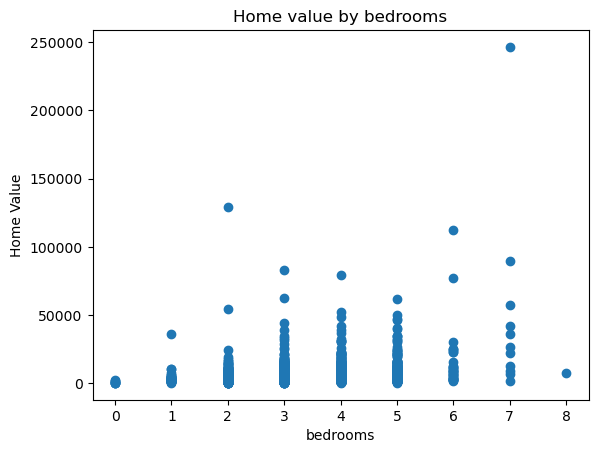

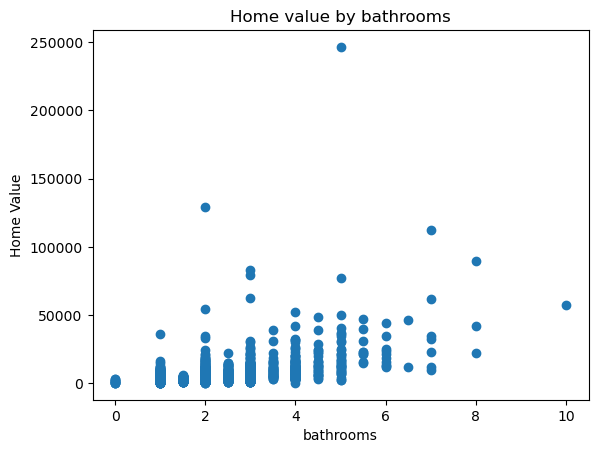

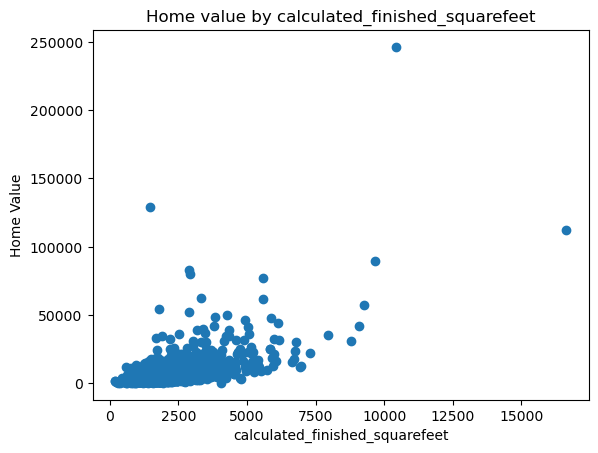

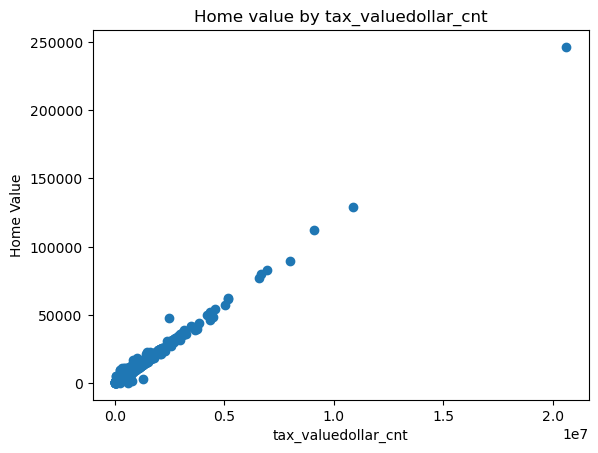

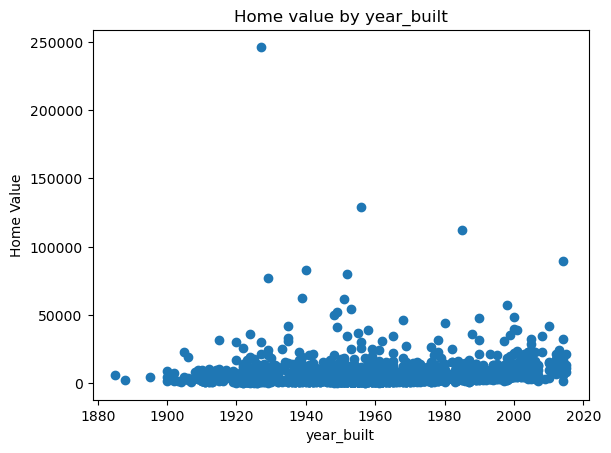

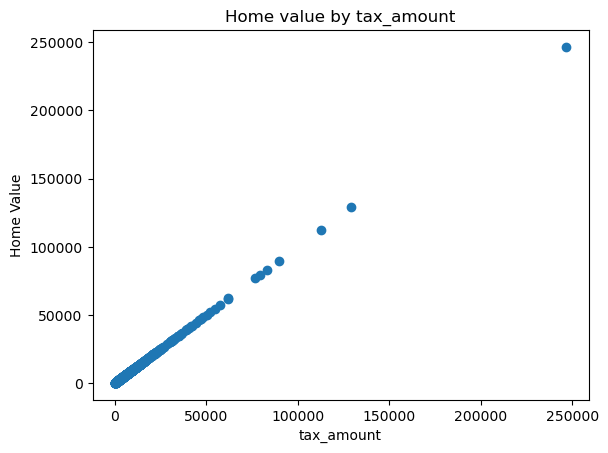

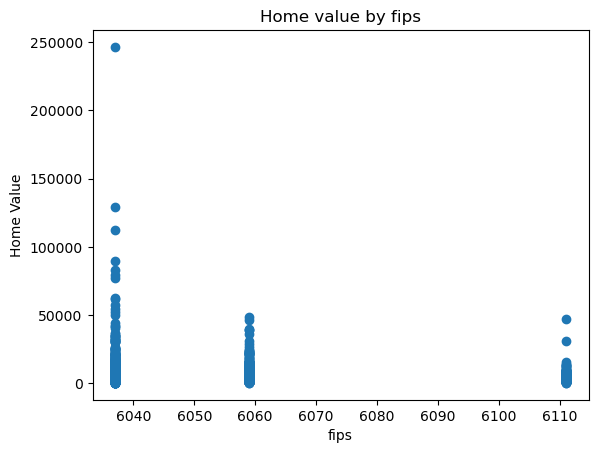

In [33]:
for cols in train.columns:
    plt.scatter( x = train[cols], y = train['tax_amount'])
    plt.xlabel(cols)
    plt.ylabel('Home Value')
    plt.title(f'Home value by {cols}')
    plt.show()

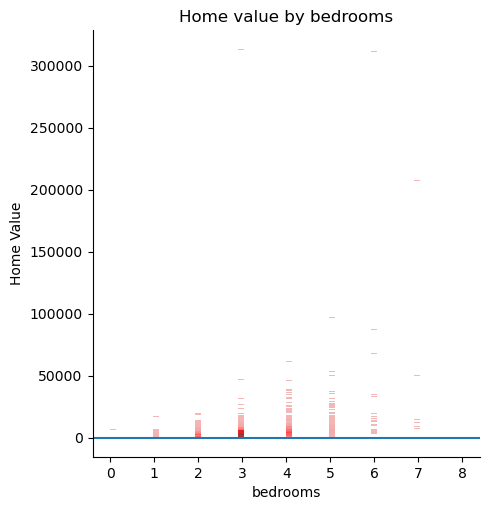

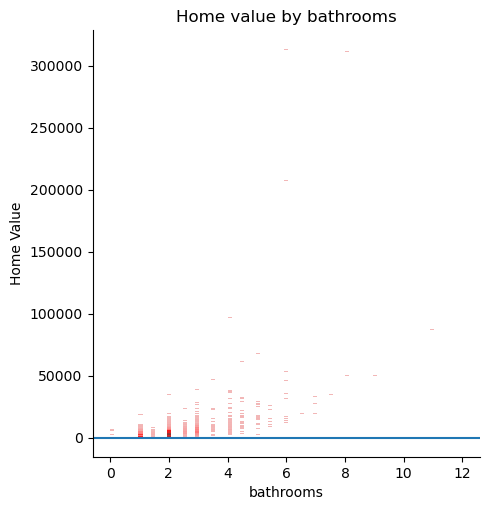

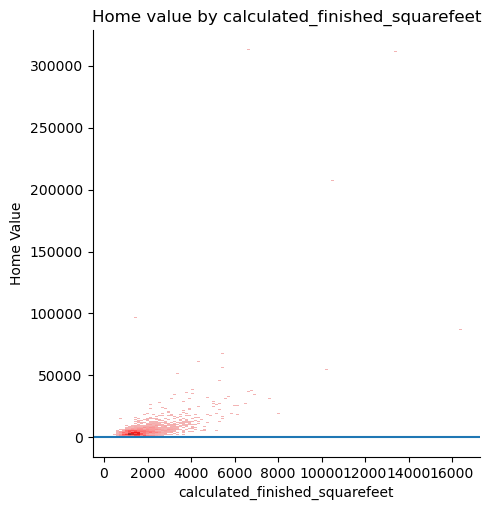

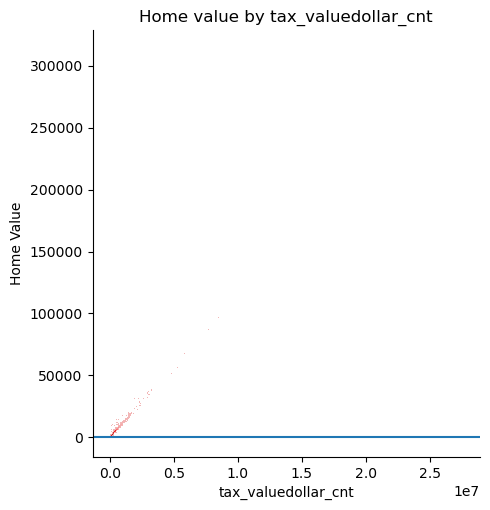

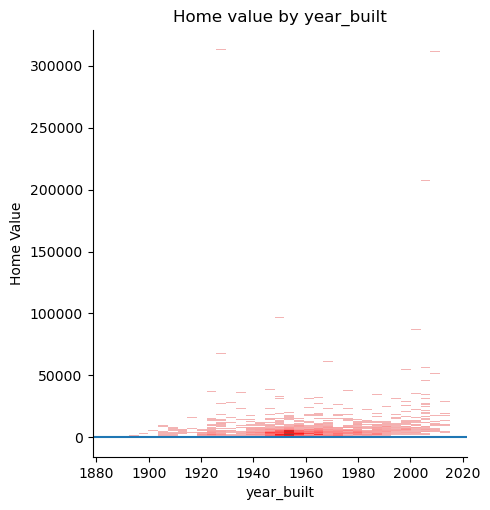

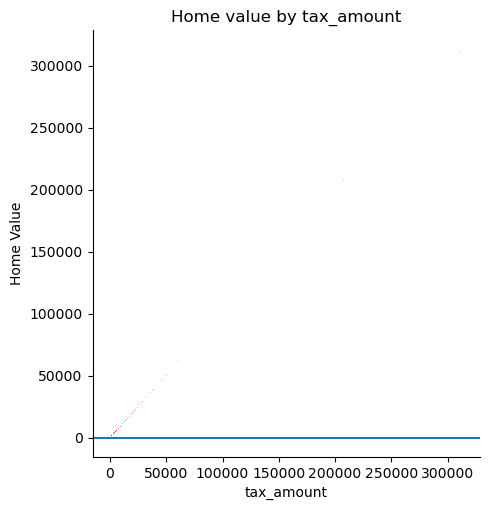

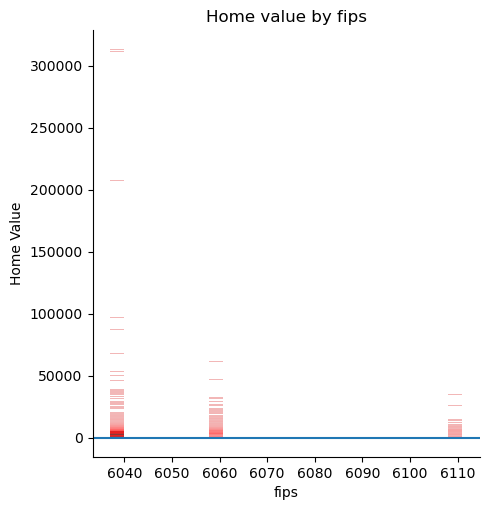

In [18]:
for cols in train.columns:
    sns.displot( x = train[cols], y= train['tax_amount'], color= 'red')
    plt.xlabel(cols)
    plt.ylabel('Home Value')
    plt.title(f'Home value by {cols}')
    plt.axhline(y=0) 
    plt.show()

In [22]:
round(train.describe(),2)

,bedrooms,bathrooms,calculated_finished_squarefeet,tax_valuedollar_cnt,year_built,tax_amount,fips
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,3.31,2.25,1877.13,484233.16,1960.98,5877.03,6048.82
std,0.93,1.01,1034.30,1031154.03,21.76,12042.94,20.79
min,0.00,0.00,280.00,8330.00,1885.00,148.62,6037.00
25%,3.00,2.00,1246.00,186951.75,1949.00,2510.70,6037.00
50%,3.00,2.00,1621.00,334651.50,1959.00,4194.24,6037.00
75%,4.00,3.00,2240.25,538000.00,1976.00,6419.40,6059.00
max,8.00,12.00,16478.00,27557570.00,2015.00,313117.90,6111.00


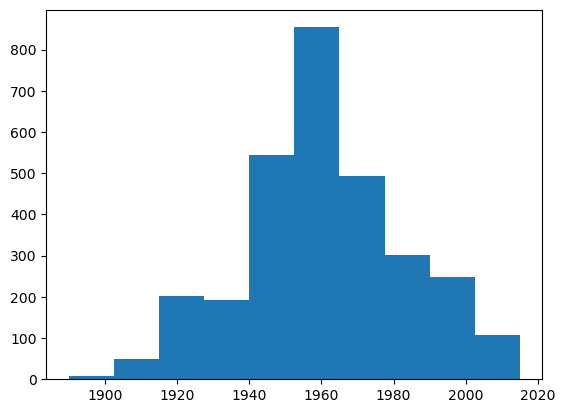

In [8]:
plt.hist(x=train['year_built'])
plt.show()


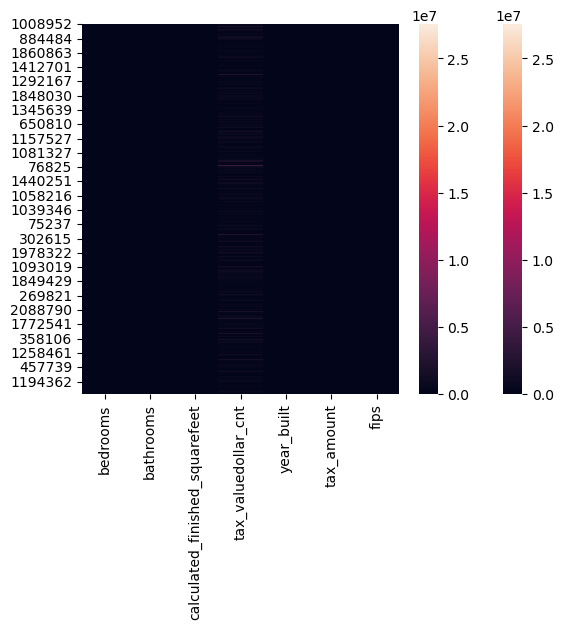

In [17]:
sns.heatmap(train)

In [64]:
df

,bedrooms,bathrooms,calculated_finished_squarefeet,tax_valuedollar_cnt,year_built,tax_amount,fips
823288,3.0,1.0,1043.0,131828.0,1945.0,2473.16,6037.0
2041962,3.0,2.0,1086.0,206834.0,1954.0,2716.81,6037.0
1203339,3.0,2.0,1701.0,432383.0,1954.0,5020.24,6059.0
866664,6.0,3.0,2906.0,478768.0,1950.0,6012.56,6037.0
1887825,3.0,2.0,1716.0,1375906.0,1947.0,16894.03,6037.0
...,...,...,...,...,...,...,...
1444904,3.0,2.0,2217.0,512907.0,1956.0,6237.97,6037.0
1889612,2.0,1.0,936.0,61666.0,1942.0,1050.43,6037.0
608984,3.0,2.0,1733.0,230336.0,1956.0,2886.38,6037.0
435462,2.0,1.0,1042.0,123938.0,1947.0,2657.30,6037.0


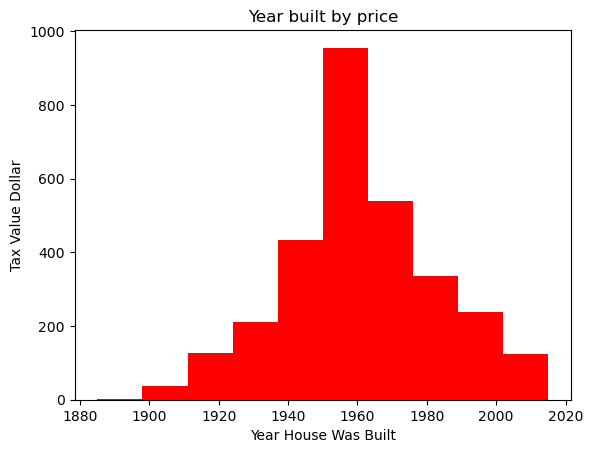

In [65]:
plt.hist(train['year_built'], color='Red')
plt.title('Year built by price')
plt.xlabel('Year House Was Built')
plt.ylabel('Tax Value Dollar')
plt.show()

In [19]:
df.columns

Index(['bedrooms', 'bathrooms', 'calculated_finished_squarefeet',
       'tax_valuedollar_cnt', 'year_built', 'tax_amount', 'fips'],
      dtype='object')

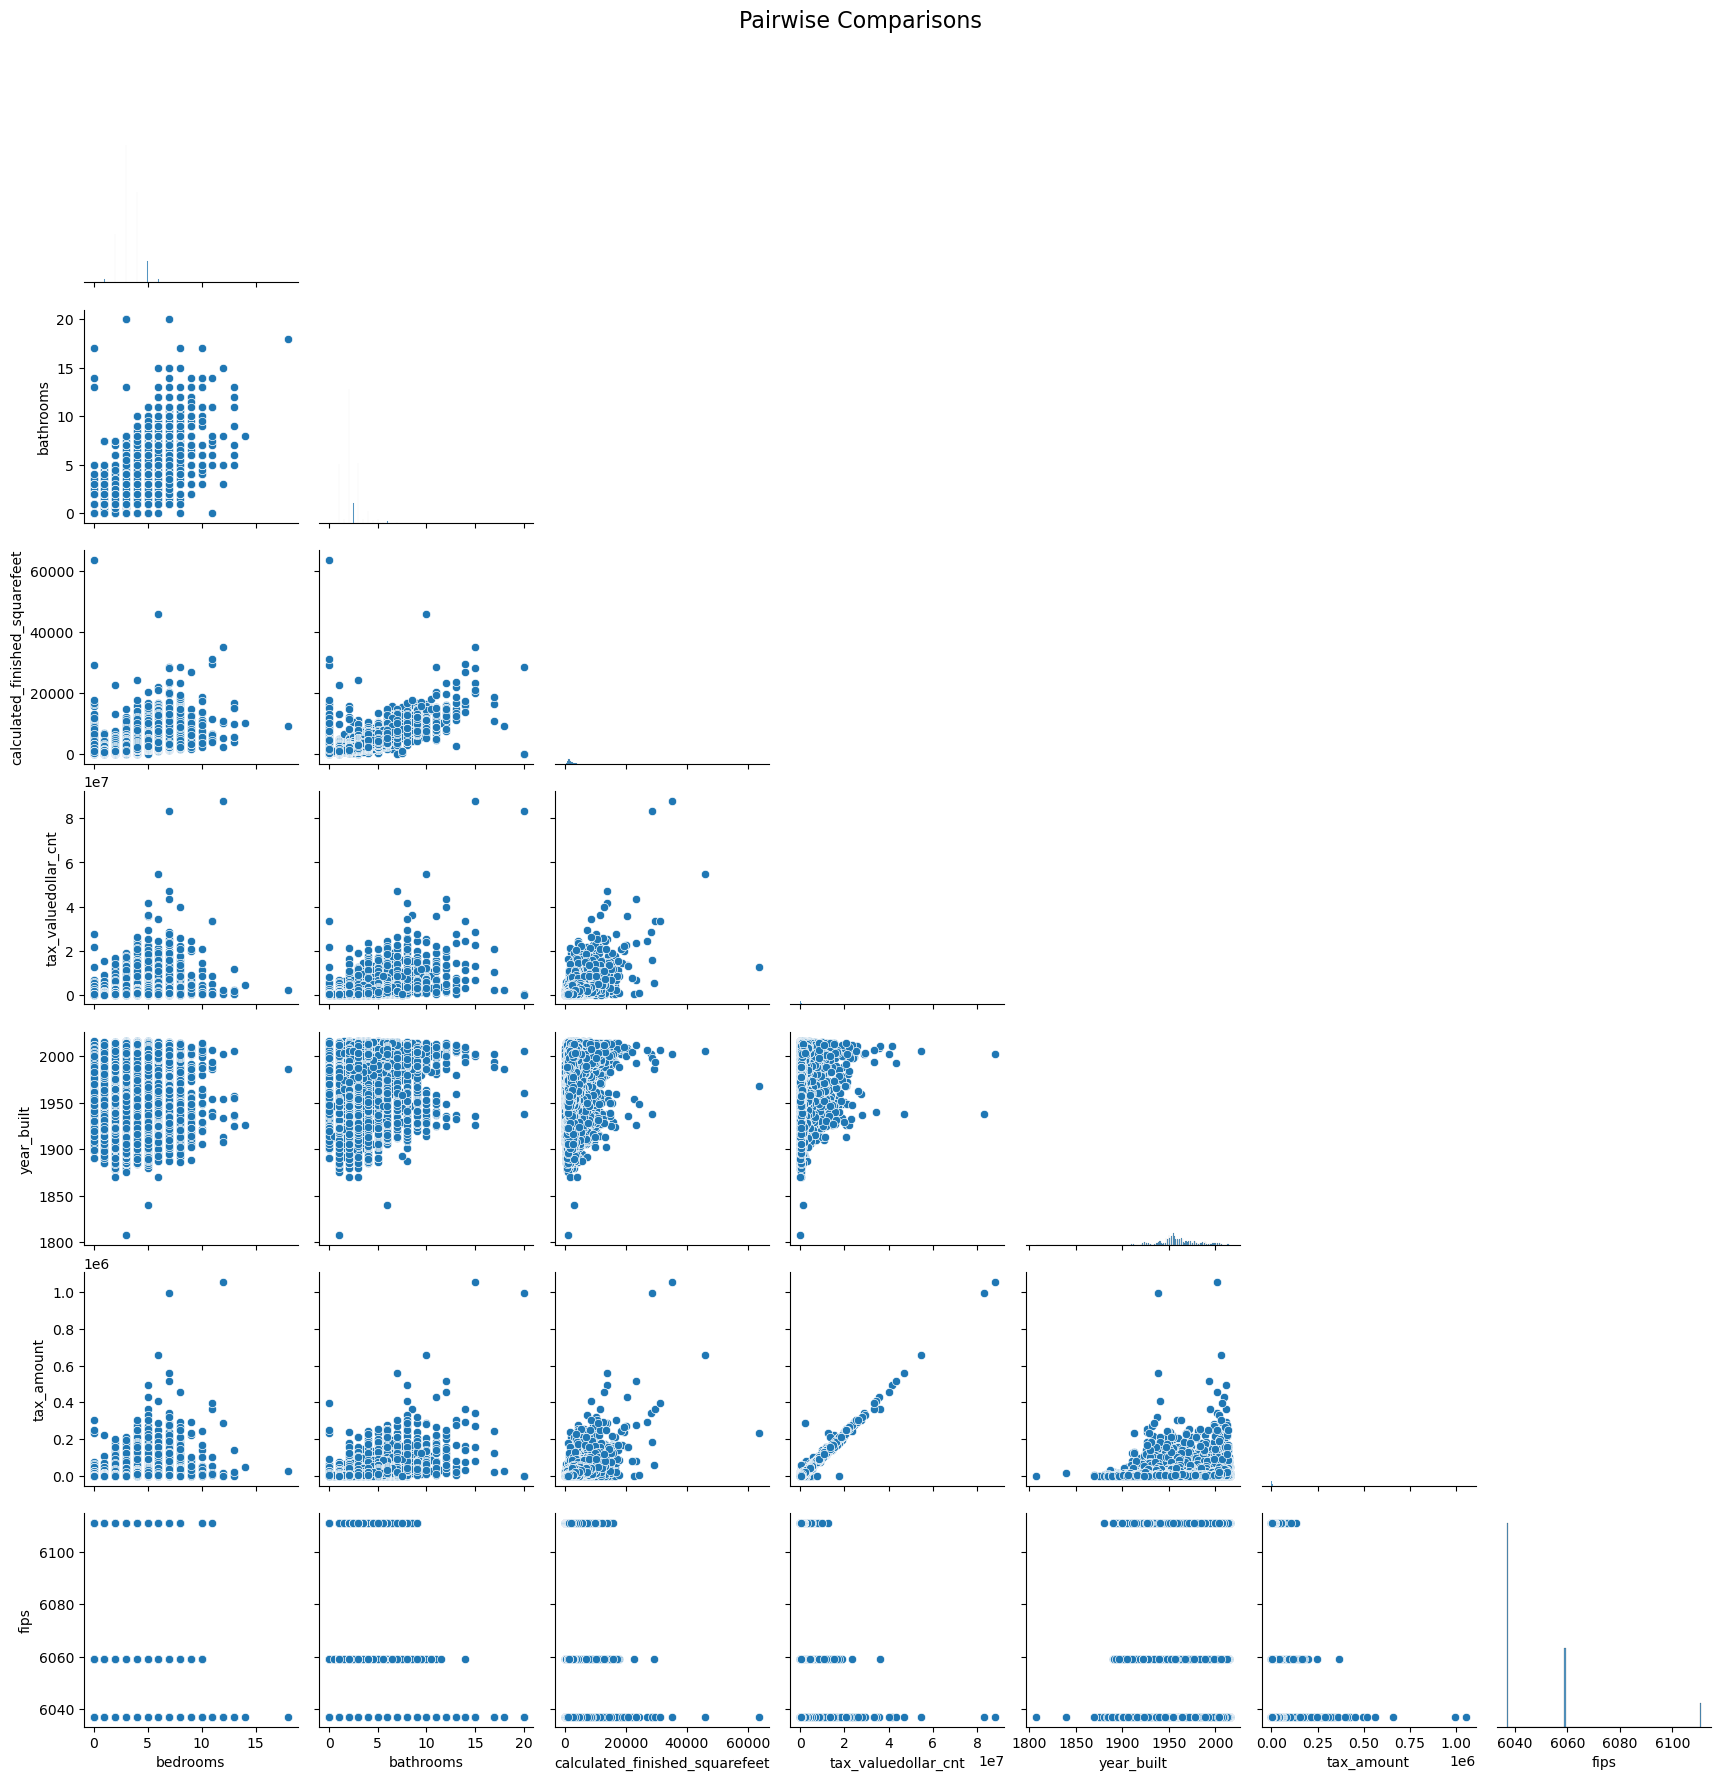

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pairplot_graph(df):

    sns.pairplot(data=df,corner=True)

    plt.suptitle('Pairwise Comparisons' , fontsize=16, y=1.02)

   
    plt.show()

pairplot_graph(validate)

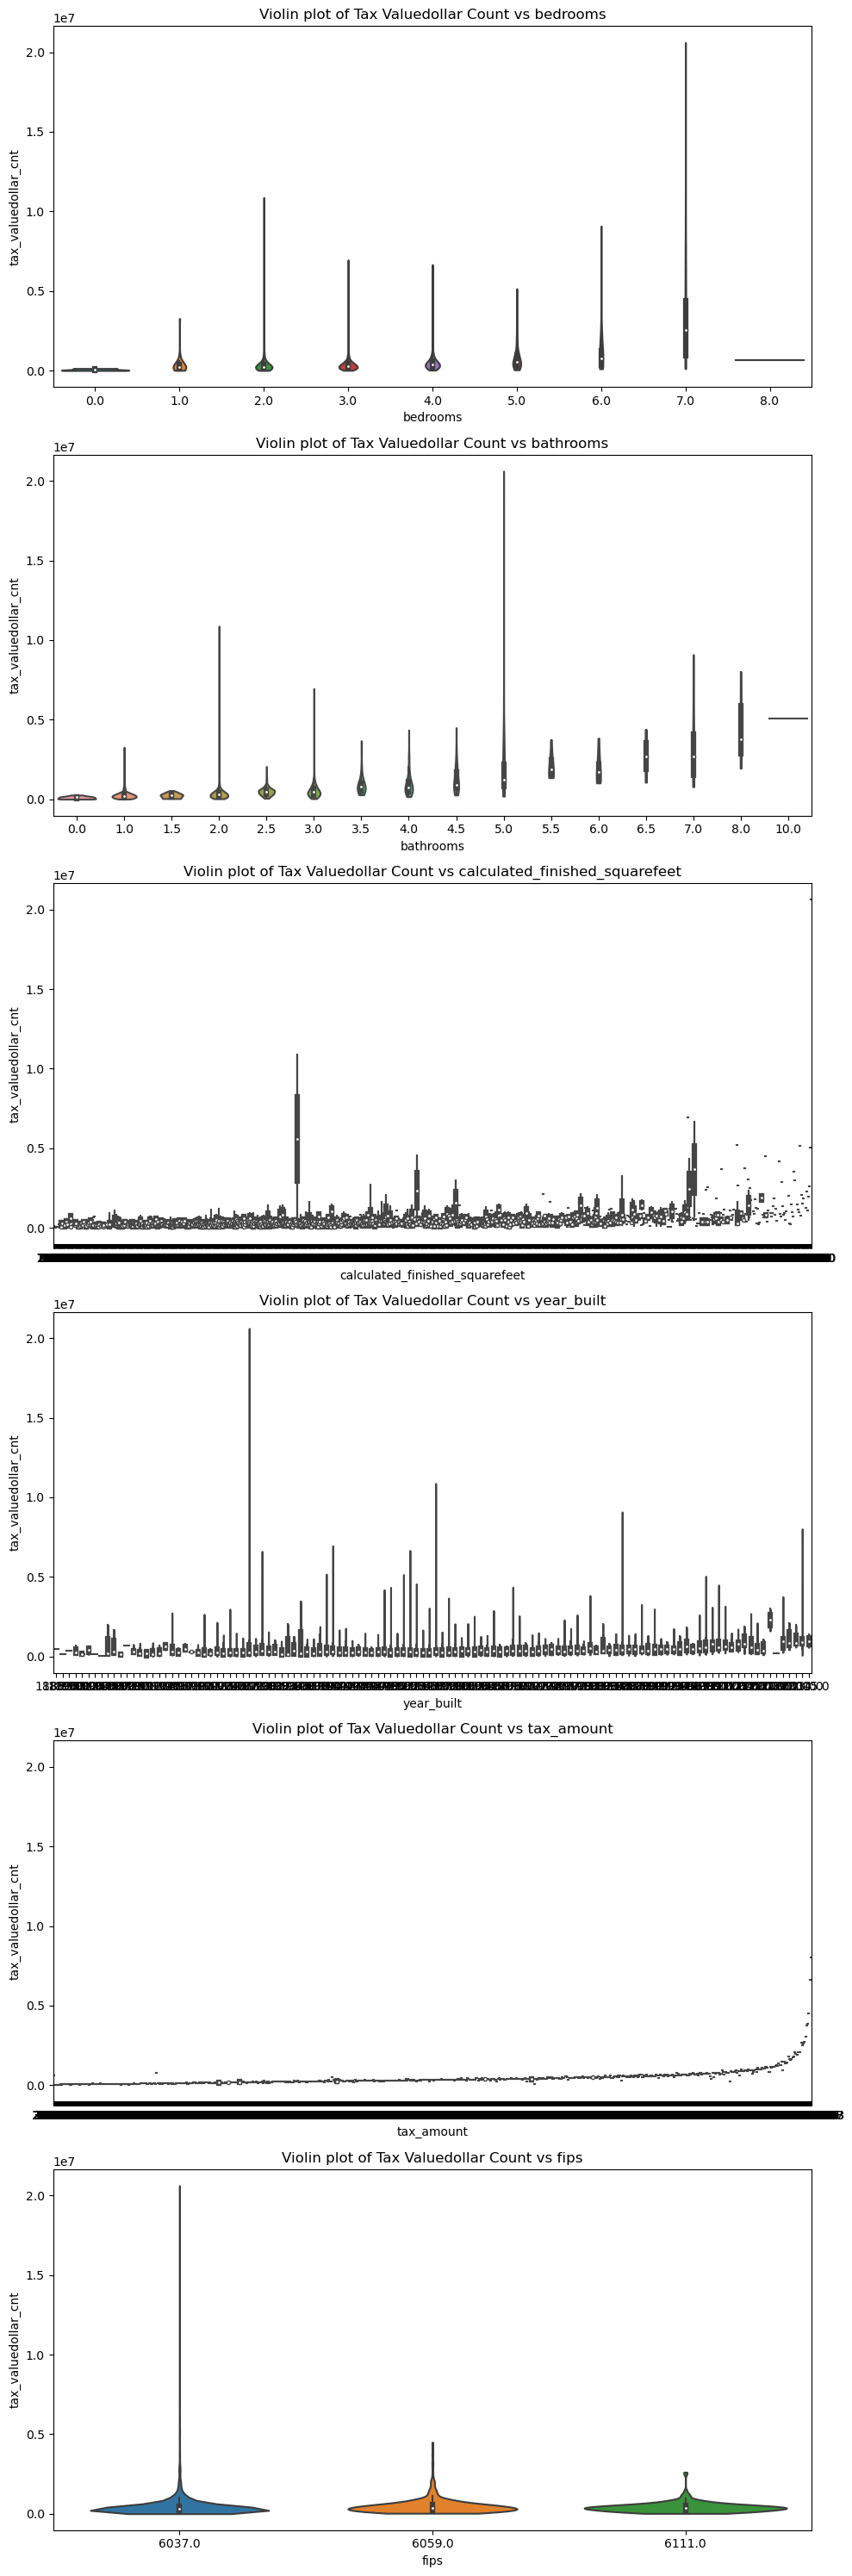

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# List of columns for comparison
columns = ['bedrooms', 'bathrooms', 'calculated_finished_squarefeet',
           'year_built', 'tax_amount', 'fips']

# Set up the plotting area with multiple subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5*len(columns)))

# Create violin plots for each column against 'tax_valuedollar_cnt'
for index, column in enumerate(columns):
    sns.violinplot(x=column, y='tax_valuedollar_cnt', data=train, ax=axes[index], cut=0)
    axes[index].set_title(f"Violin plot of Tax Valuedollar Count vs {column}")

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()


## In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

## As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

## Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns 
## that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable
## and a continuous variable.

# Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

# Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

# Come up with some initial hypotheses based on your goal of predicting property value.

# Visualize all combinations of variables in some way.

In [ ]:
Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Explore your dataset with any other visualizations you think will be helpful.

Bonus Exercise
In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

# Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
import seaborn as sns

def plot_variable_pairs(df):
    sns.set(style="ticks", color_codes=True)
    sns.pairplot(df, kind="reg")

In [12]:
col_list = list(train.columns)
col_list

['bedrooms',
 'bathrooms',
 'calculated_finished_squarefeet',
 'tax_valuedollar_cnt',
 'year_built',
 'tax_amount',
 'fips']